day – Day of the observation (1–31).

month – Month of the observation 

year – Year of observation (all entries are from 2012).

Temperature – Ambient temperature in Celsius (°C).

RH – Relative Humidity (%).

Ws – Wind speed (km/h).

Rain – Rainfall amount (mm).

FFMC – Fine Fuel Moisture Code (numeric index related to moisture content of litter and other fine fuels).

DMC – Duff Moisture Code (numeric index related to the average moisture content of loosely compacted organic layers of moderate depth).

DC – Drought Code (numeric index related to the average moisture content of deep, compact organic layers).

ISI – Initial Spread Index (a numeric index that estimates the rate of fire spread immediately after ignition).

BUI – Buildup Index (a numeric index that represents the total amount of fuel available for combustion).

FWI – Fire Weather Index (a numeric index that estimates the potential fire intensity).

Classes – Fire occurrence class (e.g., "fire" or "not fire").

Region – Region code (0 = Bejaia Region, 1 = Sidi Bel-abbes Region).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("algerian_forest_fire_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.loc[:125,'region']=0
df.loc[125:,'region']=1

In [5]:
df['region']=df['region'].astype(int)

In [6]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
region         0
dtype: int64

In [7]:
df=df.dropna().reset_index(drop=True)

In [8]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1,0


In [9]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
 12  region       243 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 24.8+ KB


In [11]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

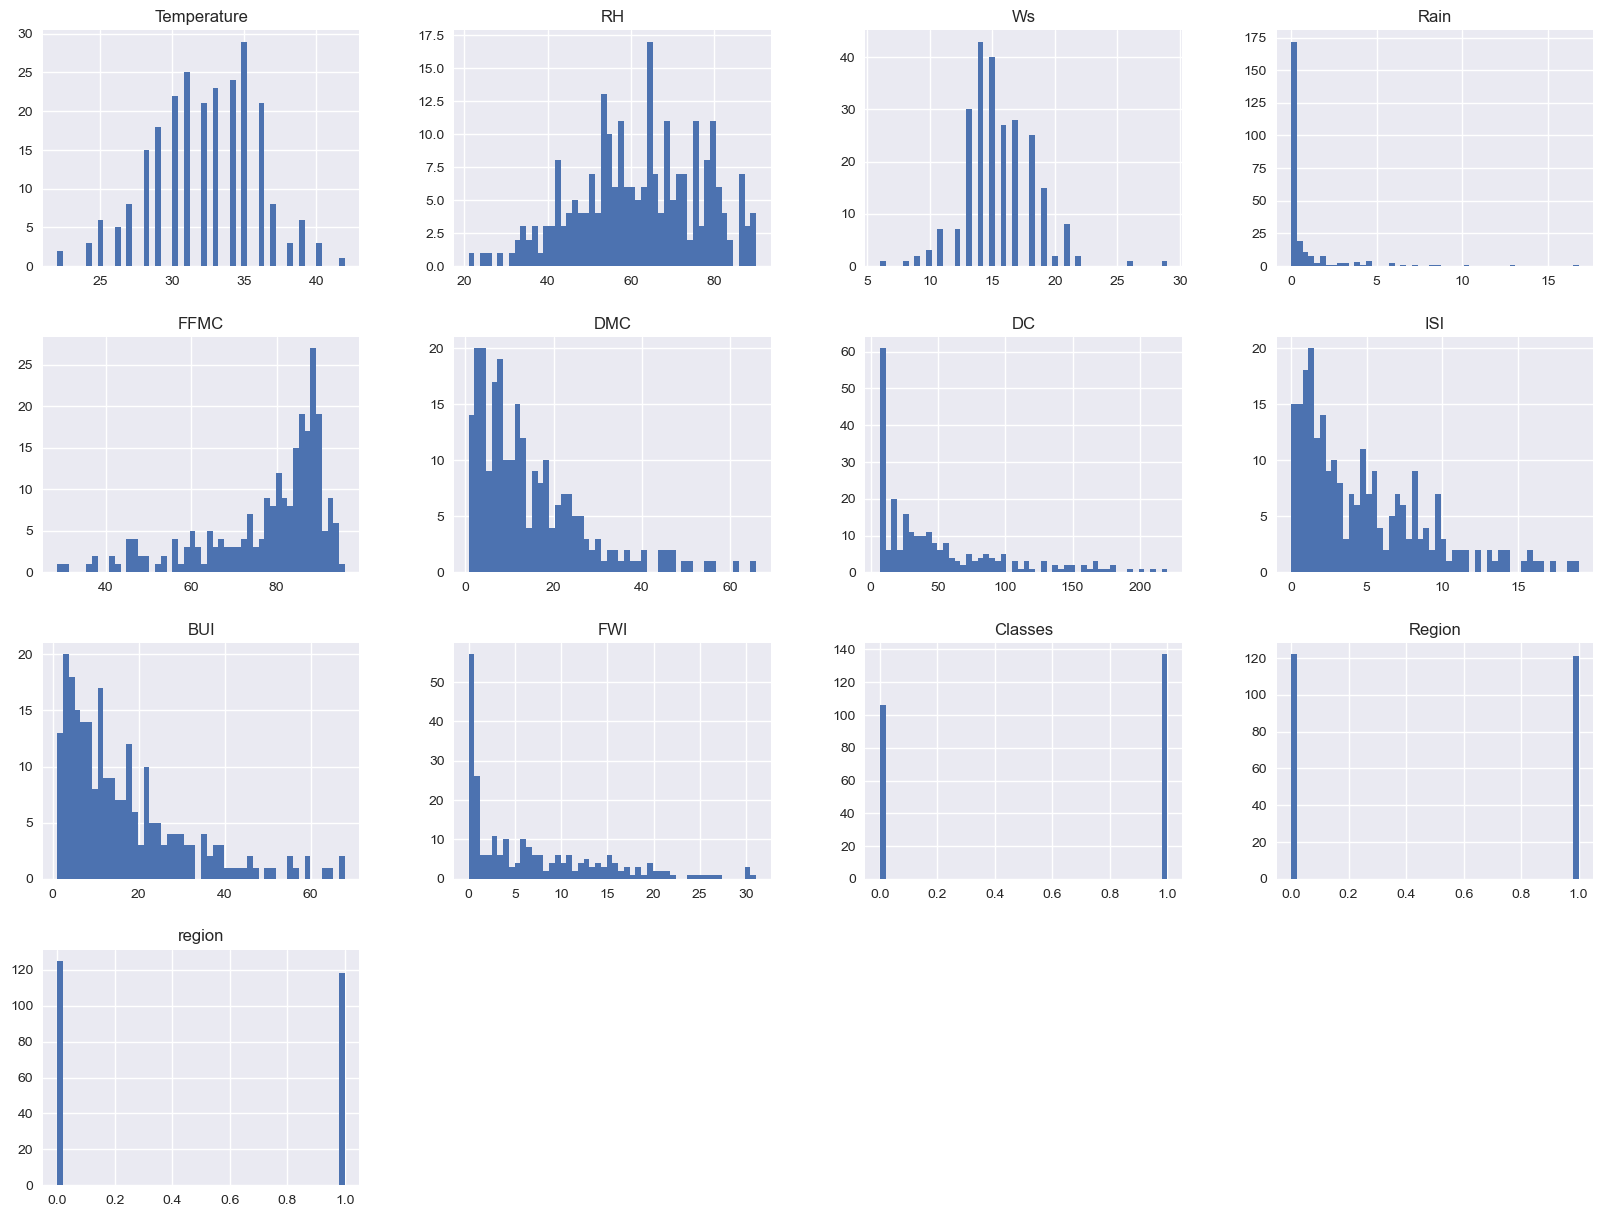

In [13]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')  # modern seaborn style
df.hist(bins=50, figsize=(20, 15))
plt.show()


In [14]:
cha=df['Classes'].value_counts()

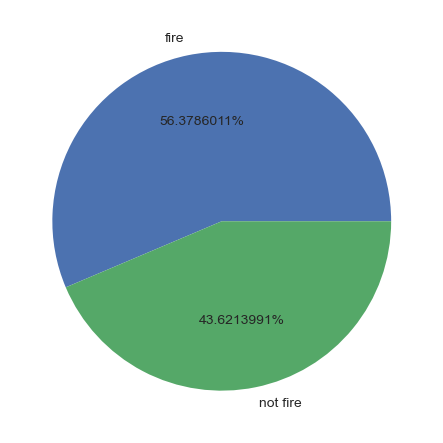

In [15]:
label=['fire','not fire']

plt.pie(cha,labels=label,autopct='%f1%%')
plt.show()

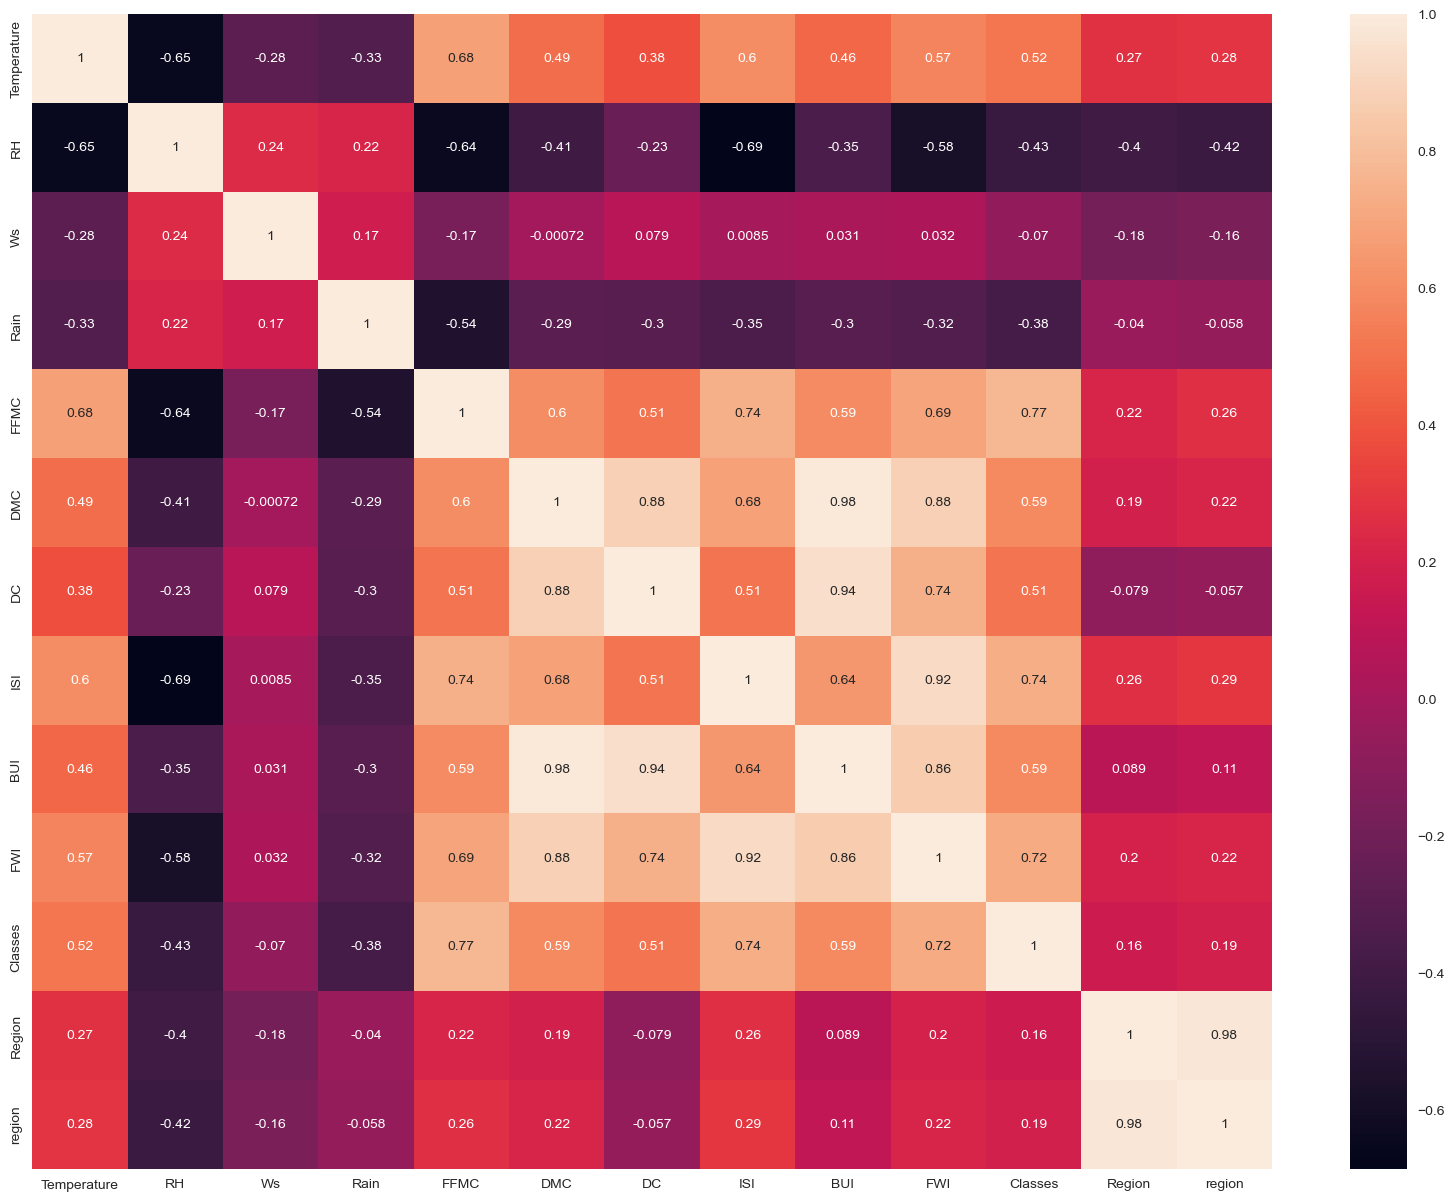

In [16]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

plt.show()

In [17]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [18]:
#training the dataset // train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


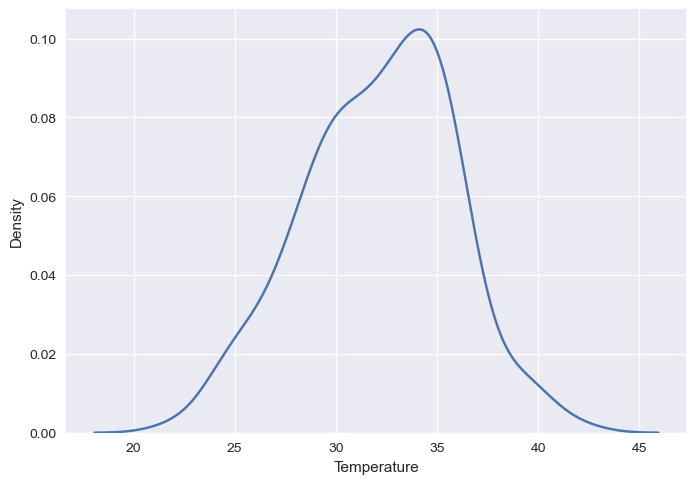

In [19]:
##feature selection based on correlation
x_train.corr()
sns.kdeplot(x_train['Temperature'])
plt.show()

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
#feature scaling and standization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

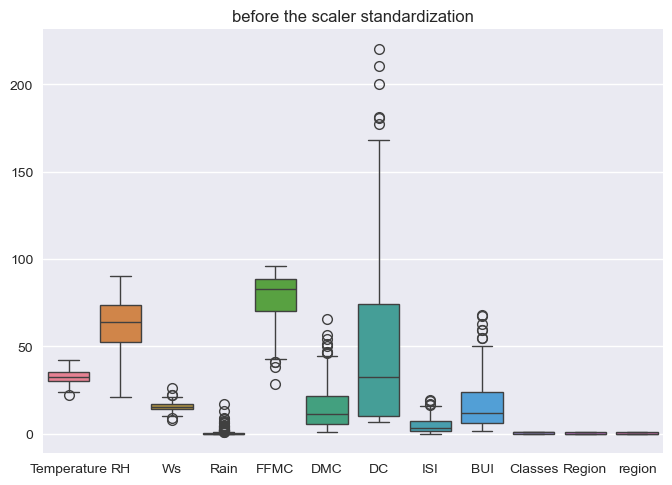

In [22]:
#box plot to understand the effect on outlier
plt.Figure(figsize=(20,15))
sns.boxplot(data=x_train)
plt.title("before the scaler standardization")
plt.show()

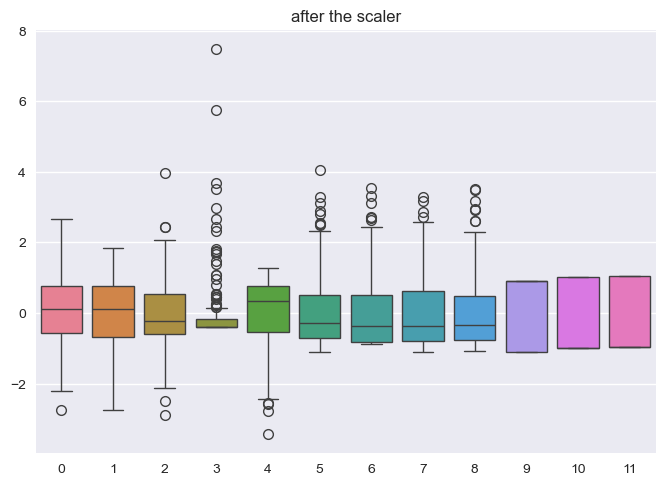

In [23]:
plt.Figure(figsize=(20,15))
sns.boxplot(data=x_train_scaler)
plt.title("after the scaler")
plt.show()
plt.tight_layout()

0.46507339627563515


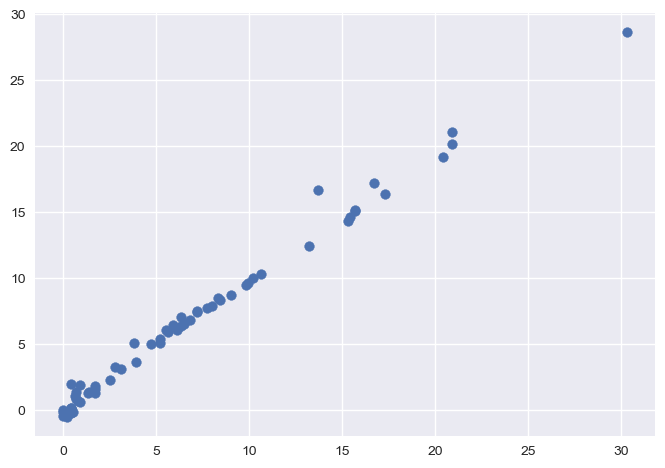

In [24]:
from sklearn.linear_model import LinearRegression
linereg=LinearRegression()
linereg.fit(x_train_scaler,y_train)
y_ped=linereg.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_ped)
print(mae)
plt.scatter(y_test,y_ped)
plt.show()

0.46507339627563515
0.9895115288040849


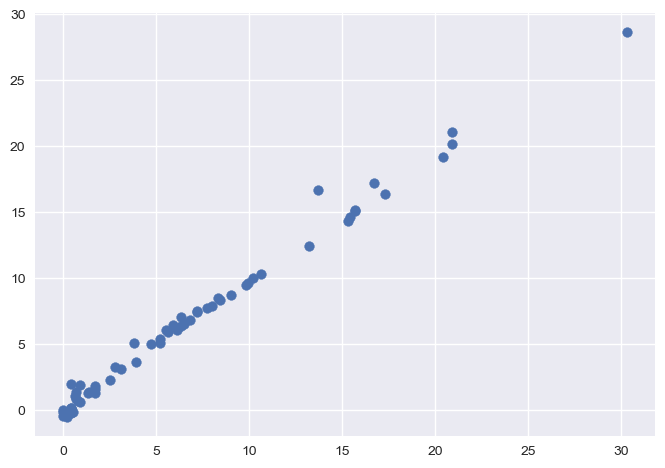

In [26]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaler,y_train)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_ped)
print(mae)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_ped)
print(score)
plt.scatter(y_test,y_ped)
plt.show()

0.46507339627563515
0.9895115288040849


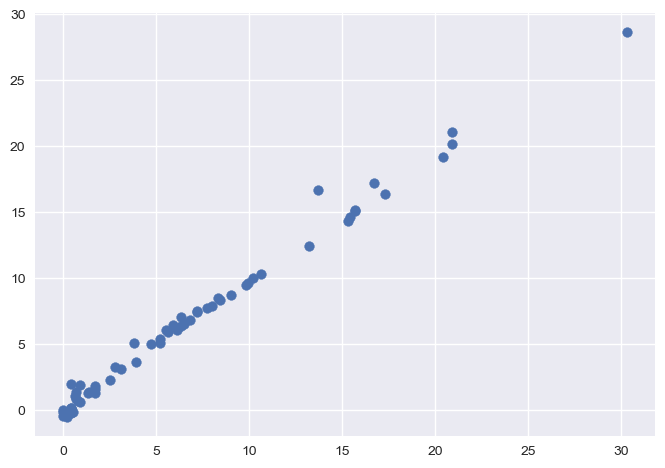

In [27]:
from sklearn.linear_model import Ridge
rigde=Ridge()
rigde.fit(x_train_scaler,y_train)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_ped)
print(mae)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_ped)
print(score)
plt.scatter(y_test,y_ped)
plt.show()

In [36]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaler,y_train)
y_ped=lassocv.predict(x_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_ped)
print(score)

-91.69847199563971


f:\anacoda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


f:\anacoda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


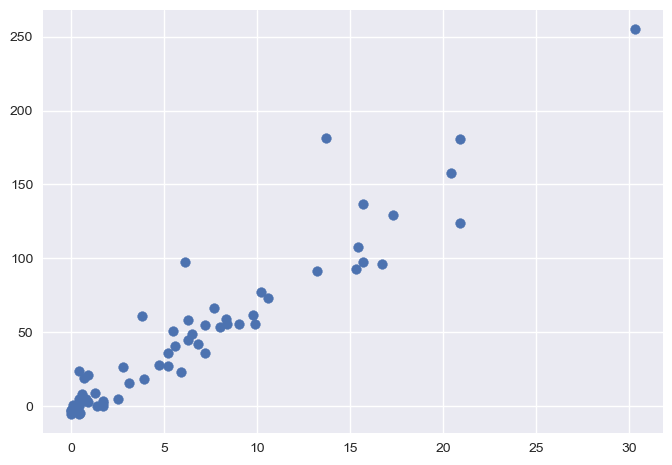

In [29]:
y_ped=lassocv.predict(x_test)
plt.scatter(y_test,y_ped)
plt.show()

In [30]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [38]:
import pickle 
pickle.dump(rigde,open('rigde.pkl','wb'))

In [39]:
model=pickle.load(open('rigde.pkl','rb'))

In [40]:
model.predict(x_train_scaler)

array([ 8.50777440e-01, -4.36835619e-01,  2.17328401e+01,  3.21974201e+00,
        1.37121637e+00,  9.61954796e+00,  6.95150900e+00,  1.04172174e+01,
       -4.86256038e-01,  8.10115861e+00,  1.21937228e+01,  1.56729953e+01,
        1.26436079e+01, -1.29260935e-01,  1.37693202e+00,  1.50073936e-01,
        2.86204452e+00,  1.43466883e+01, -4.27421517e-03,  9.18841349e+00,
        5.42862139e+00,  6.30134340e+00,  9.22584933e+00,  2.88180180e+01,
        6.44915174e-01, -9.66247544e-02,  8.10589651e-01,  6.92877073e+00,
        5.65502538e+00,  2.98779289e+00, -4.67298641e-01,  6.95470026e-01,
        1.53075470e+00,  4.52479240e+00, -1.27431267e-01, -1.85679954e-01,
        1.96321096e+01,  4.98880132e+00,  1.24450748e+00,  1.40378459e+01,
        1.15496348e+01,  1.48446448e+01,  1.26359330e+00,  1.42338062e+01,
        1.28942682e+01,  3.54375393e+00,  2.74181743e-01,  2.46849991e+01,
        3.70915040e-01, -2.36611005e-01,  1.37070937e+01,  4.00357163e+00,
       -3.35090157e-01,  